Data Understanding

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import (silhouette_score, classification_report, accuracy_score, roc_curve, roc_auc_score)
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
# Load dataset
df = pd.read_csv("/content/oral_cancer_prediction_dataset_modified.csv")

In [ ]:
TARGET_COL = "Oral Cancer (Diagnosis)"
assert TARGET_COL in df.columns, f"Missing target column: {TARGET_COL}"

In [ ]:
# Basic EDA
print("Shape:", df.shape)

Shape: (4680, 25)


In [ ]:
df.columns.tolist()

['ID',
 'Country',
 'Age',
 'Gender',
 'Tobacco Use',
 'Alcohol Consumption',
 'HPV Infection',
 'Betel Quid Use',
 'Chronic Sun Exposure',
 'Poor Oral Hygiene',
 'Diet (Fruits & Vegetables Intake)',
 'Family History of Cancer',
 'Compromised Immune System',
 'Oral Lesions',
 'Unexplained Bleeding',
 'Difficulty Swallowing',
 'White or Red Patches in Mouth',
 'Tumor Size (cm)',
 'Cancer Stage',
 'Treatment Type',
 'Survival Rate (5-Year, %)',
 'Cost of Treatment (USD)',
 'Economic Burden (Lost Workdays per Year)',
 'Early Diagnosis',
 'Oral Cancer (Diagnosis)']

In [ ]:
df.head()

,ID,Country,Age,Gender,Tobacco Use,Alcohol Consumption,HPV Infection,Betel Quid Use,Chronic Sun Exposure,Poor Oral Hygiene,...,Difficulty Swallowing,White or Red Patches in Mouth,Tumor Size (cm),Cancer Stage,Treatment Type,"Survival Rate (5-Year, %)",Cost of Treatment (USD),Economic Burden (Lost Workdays per Year),Early Diagnosis,Oral Cancer (Diagnosis)
0,65946.0,Sri Lanka,54.0,Female,Yes,Yes,Yes,Yes,No,Yes,...,Yes,Yes,0.000000,0.0,No Treatment,100.000000,0.00,0.0,Yes,No
1,33292.0,Italy,40.0,Male,Yes,Yes,No,No,No,No,...,No,Yes,3.045653,1.0,Radiation,86.044637,49946.25,175.0,Yes,Yes
2,24594.0,Taiwan,65.0,Male,No,Yes,No,No,Yes,No,...,No,No,4.940740,3.0,Targeted Therapy,32.478185,102357.50,93.0,No,Yes
3,42936.0,Sri Lanka,38.0,Male,Yes,Yes,No,Yes,No,No,...,No,No,4.177902,3.0,Radiation,37.469577,65527.00,153.0,No,Yes
4,36674.0,UK,54.0,Male,Yes,Yes,No,No,No,Yes,...,No,No,0.000000,0.0,No Treatment,100.000000,0.00,0.0,No,No


In [ ]:
df.describe(include="all")

,ID,Country,Age,Gender,Tobacco Use,Alcohol Consumption,HPV Infection,Betel Quid Use,Chronic Sun Exposure,Poor Oral Hygiene,...,Difficulty Swallowing,White or Red Patches in Mouth,Tumor Size (cm),Cancer Stage,Treatment Type,"Survival Rate (5-Year, %)",Cost of Treatment (USD),Economic Burden (Lost Workdays per Year),Early Diagnosis,Oral Cancer (Diagnosis)
count,4368.000000,4359,4368.000000,4359,4359,4359,4359,4359,4359,4359,...,4359,4359,4368.000000,4368.000000,4359,4368.000000,4368.000000,4368.000000,4359,4359
unique,NaN,17,NaN,2,2,2,2,2,2,2,...,2,2,NaN,NaN,5,NaN,NaN,NaN,2,2
top,NaN,India,NaN,Male,Yes,Yes,No,No,No,No,...,No,No,NaN,NaN,No Treatment,NaN,NaN,NaN,Yes,Yes
freq,NaN,428,NaN,3094,3495,2573,3075,3125,3481,2212,...,3333,2872,NaN,NaN,2633,NaN,NaN,NaN,2366,2199
mean,46992.036899,NaN,59.673412,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,1.959309,1.222958,NaN,87.396808,42785.479806,57.804712,NaN,NaN
std,46609.304648,NaN,51.502407,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,2.623783,1.677572,NaN,78.380855,57196.772270,77.756789,NaN,NaN
min,104.000000,NaN,15.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0.000000,0.000000,NaN,10.048731,0.000000,0.000000,NaN,NaN
25%,22312.000000,NaN,48.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0.000000,0.000000,NaN,65.634443,0.000000,0.000000,NaN,NaN
50%,43515.500000,NaN,55.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,1.105594,1.000000,NaN,100.000000,28766.875000,32.500000,NaN,NaN
75%,64659.750000,NaN,62.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,3.694211,2.000000,NaN,100.000000,76615.875000,107.000000,NaN,NaN


In [ ]:
df.isnull().sum().sort_values(ascending=False)

,0
Country,321
Betel Quid Use,321
Gender,321
Tobacco Use,321
Alcohol Consumption,321
Chronic Sun Exposure,321
HPV Infection,321
Diet (Fruits & Vegetables Intake),321
Poor Oral Hygiene,321
Treatment Type,321


In [ ]:
df.duplicated().sum()

np.int64(319)

In [ ]:
df[TARGET_COL].value_counts(dropna=False)

,count
Oral Cancer (Diagnosis),
Yes,2199
No,2160
NaN,321


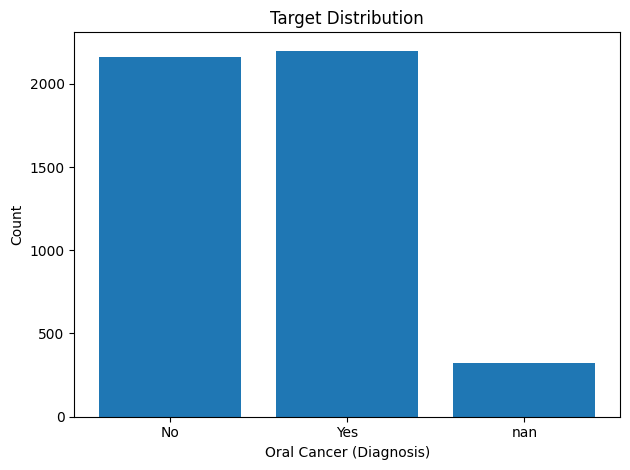

In [ ]:
# Target bar
plt.figure()
vc = df[TARGET_COL].value_counts(dropna=False).sort_index()
plt.bar(vc.index.astype(str), vc.values)
plt.title("Target Distribution")
plt.xlabel(TARGET_COL); plt.ylabel("Count"); plt.tight_layout(); plt.show()

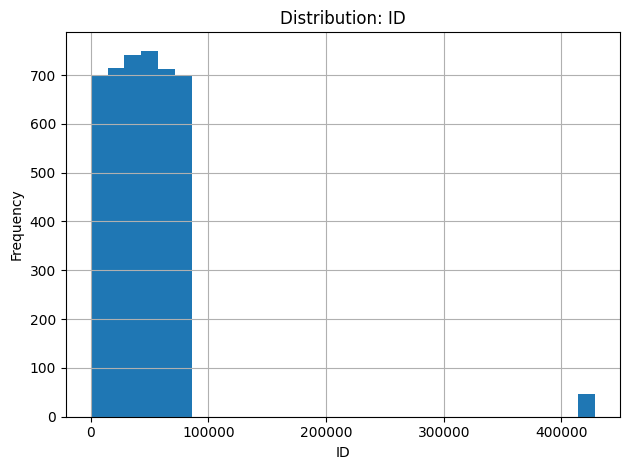

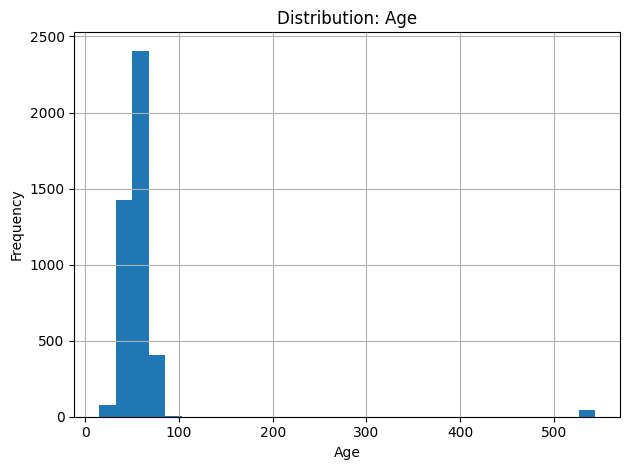

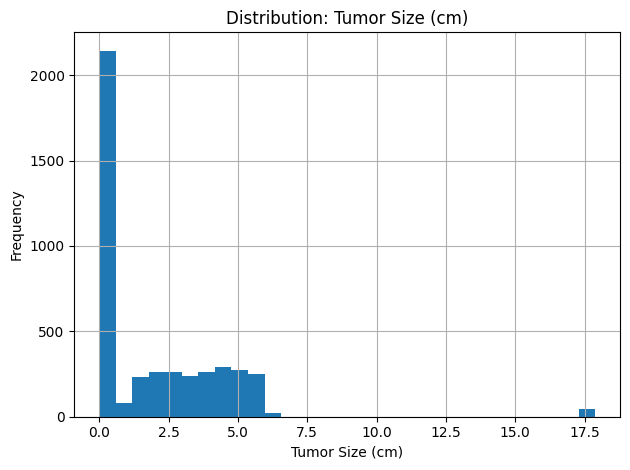

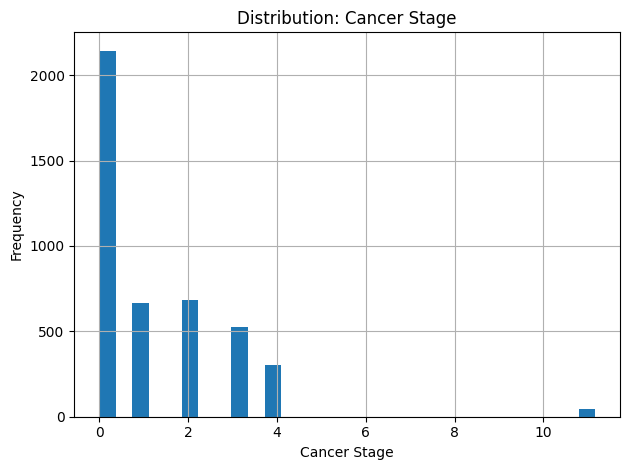

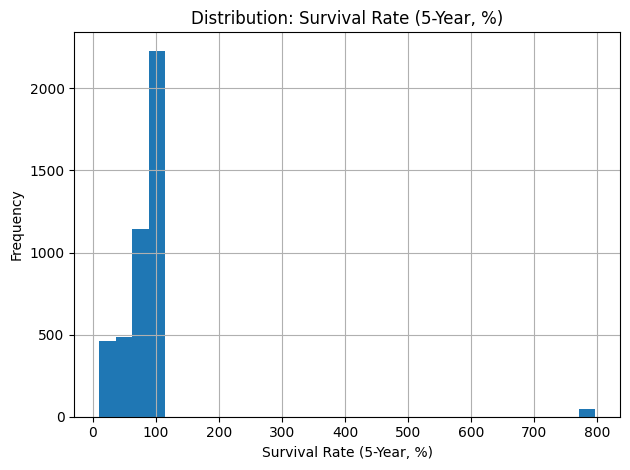

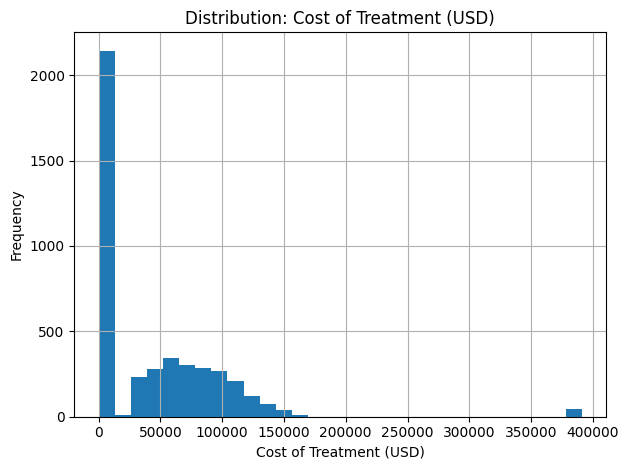

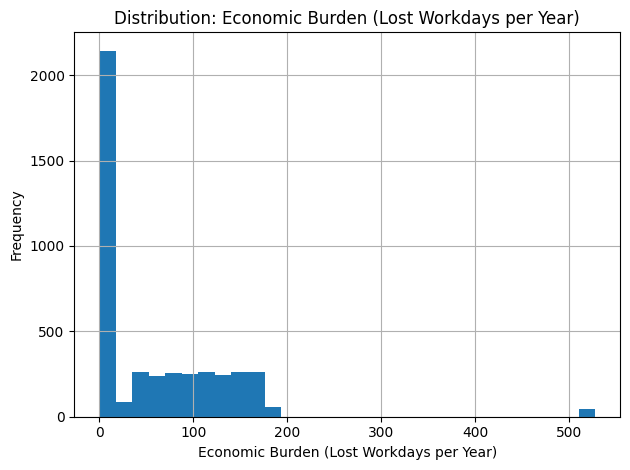

In [ ]:
# Numeric histograms
num_cols = df.select_dtypes(include=[np.number]).columns.tolist()
for col in num_cols:
    plt.figure()
    df[col].hist(bins=30)
    plt.title(f"Distribution: {col}")
    plt.xlabel(col); plt.ylabel("Frequency"); plt.tight_layout(); plt.show()

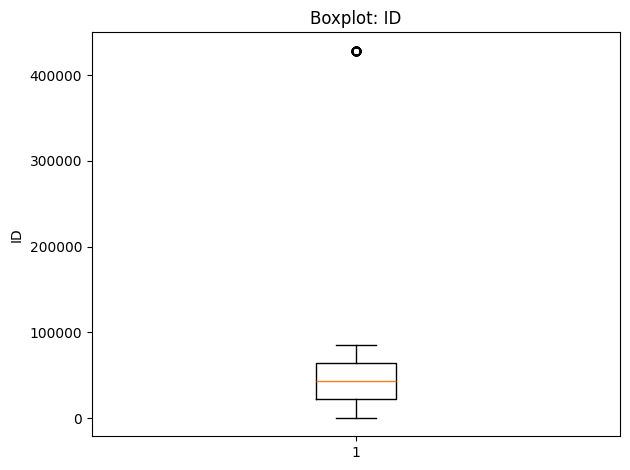

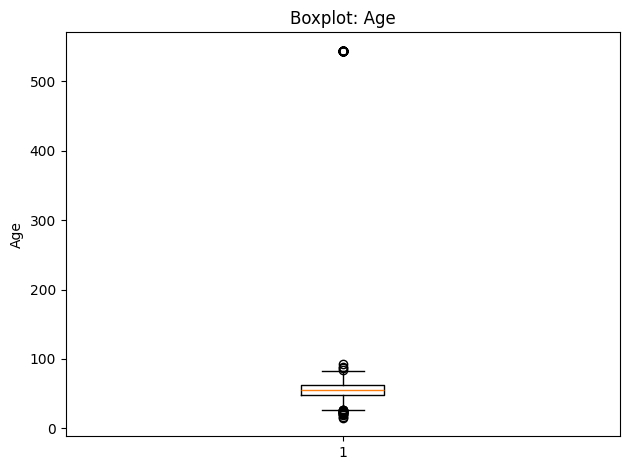

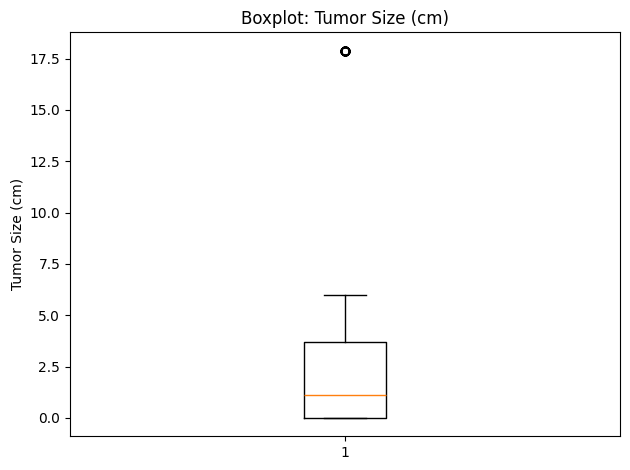

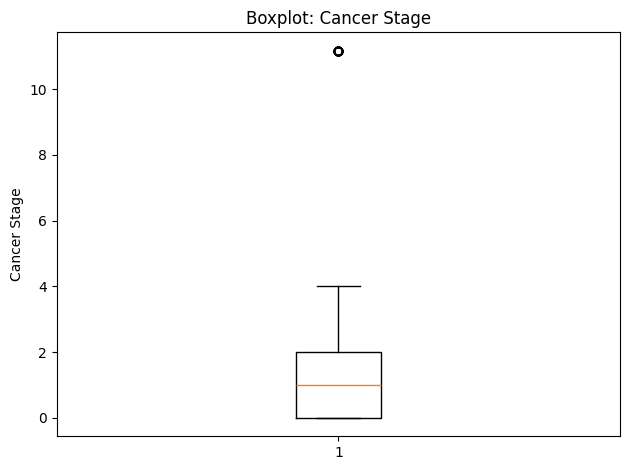

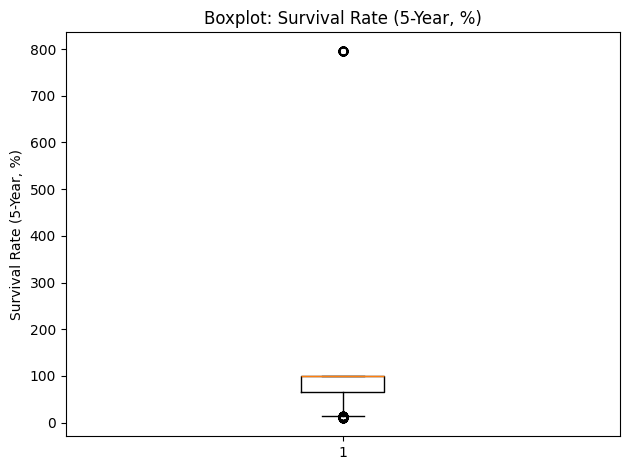

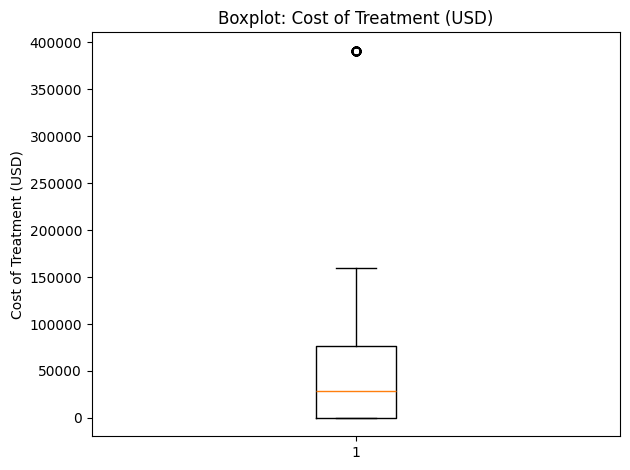

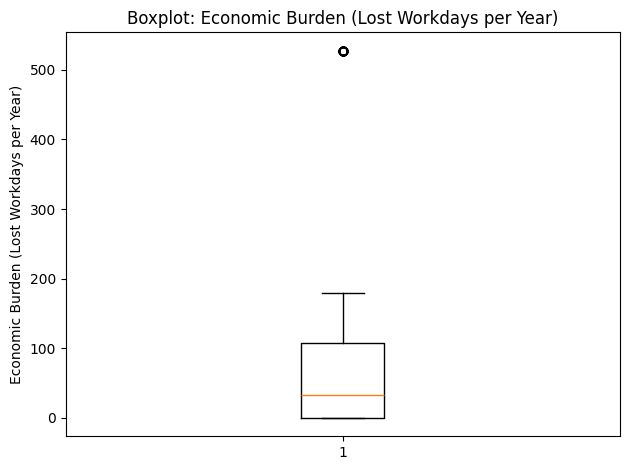

In [ ]:
# Boxplots (one per feature)
for col in num_cols:
    plt.figure()
    plt.boxplot(df[col].dropna())
    plt.title(f"Boxplot: {col}")
    plt.ylabel(col); plt.tight_layout(); plt.show()

Data Preprocessing (Cleaning + Transformation)

In [ ]:
# 🔹 Fix: Drop rows where target (Oral Cancer Diagnosis) is missing
df = df.dropna(subset=["Oral Cancer (Diagnosis)"]).reset_index(drop=True)

In [ ]:
# Remove duplicates
df = df.drop_duplicates().reset_index(drop=True)

In [ ]:
# Feature Engineering
if "Age" in df.columns:
    df["Age_binned"] = pd.cut(df["Age"], bins=[0,30,50,100],
                              labels=["Young","Middle","Old"])

if "Tumor Size (cm)" in df.columns:
    try:
        df["Tumor_Size_Discrete"] = pd.qcut(df["Tumor Size (cm)"], q=4,
                                            labels=False, duplicates="drop")
    except ValueError:
        df["Tumor_Size_Discrete"] = pd.cut(df["Tumor Size (cm)"], bins=4,
                                           labels=False)

In [ ]:
# Split features and target
X = df.drop("Oral Cancer (Diagnosis)", axis=1)
y = df["Oral Cancer (Diagnosis)"]

In [ ]:
# Identify column types
num_features = X.select_dtypes(include=[np.number]).columns.tolist()
cat_features = X.select_dtypes(exclude=[np.number]).columns.tolist()

In [ ]:
# Preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ("num", Pipeline([
            ("imputer", SimpleImputer(strategy="median")),
            ("scaler", StandardScaler())
        ]), num_features),
        ("cat", Pipeline([
            ("imputer", SimpleImputer(strategy="most_frequent")),
            ("onehot", OneHotEncoder(handle_unknown="ignore"))
        ]), cat_features),
    ]
)


In [ ]:
# PCA
X_prepared = preprocessor.fit_transform(X)
pca = PCA(n_components=10, random_state=42)
X_pca = pca.fit_transform(X_prepared)
print("\nExplained variance (PCA 10):", pca.explained_variance_ratio_)


Explained variance (PCA 10): [0.32851758 0.13041828 0.05584647 0.03197785 0.03035529 0.02919939
 0.02826389 0.02712706 0.02642581 0.02552536]


In [ ]:
# Drop rows with missing target
df = df.dropna(subset=["Oral Cancer (Diagnosis)"]).reset_index(drop=True)

X = df.drop("Oral Cancer (Diagnosis)", axis=1)
y = df["Oral Cancer (Diagnosis)"]


Data Mining & Machine Learning

In [ ]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


In [ ]:
# Logistic Regression pipeline
log_reg = Pipeline([
    ("prep", preprocessor),
    ("clf", LogisticRegression(max_iter=1000, random_state=42))
])
log_reg.fit(X_train, y_train)
y_pred_log = log_reg.predict(X_test)

In [ ]:
# Random Forest pipeline
rf = Pipeline([
    ("prep", preprocessor),
    ("clf", RandomForestClassifier(random_state=42))
])
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

In [ ]:
# Support Vector Machine (SVM)
svm_model = Pipeline([
    ("prep", preprocessor),
    ("clf", SVC(probability=True, random_state=42))
])
svm_model.fit(X_train, y_train)

Pipeline(steps=[('prep',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['ID', 'Age',
                                                   'Tumor Size (cm)',
                                                   'Cancer Stage',
                                                   'Survival Rate (5-Year, %)',
                                                   'Cost of Treatment (USD)',
                                                   'Economic Burden (Lost '
                                                   'Workdays per Year)',
                                                   'Tumor_Size_Discrete']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleIm...
                                                   'Alcohol Consumption',
                                                   'HPV Infection',
                                                   'Betel Quid Use',
                                                   'Chronic Sun Exposure',
                                                   'Poor Oral Hygiene',
                                                   'Diet (Fruits & Vegetables '
                                                   'Intake)',
                                                   'Family History of Cancer',
                                                   'Compromised Immune System',
                                                   'Oral Lesions',
                                                   'Unexplained Bleeding',
                                                   'Difficulty Swallowing',
                                                   'White or Red Patches in '
                                                   'Mouth',
                                                   'Treatment Type',
                                                   'Early Diagnosis',
                                                   'Age_binned'])])),
                ('clf', SVC(probability=True, random_state=42))])

In [ ]:
# K-Nearest Neighbors (KNN)
knn_model = Pipeline([
    ("prep", preprocessor),
    ("clf", KNeighborsClassifier(n_neighbors=5))
])
knn_model.fit(X_train, y_train)

Pipeline(steps=[('prep',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['ID', 'Age',
                                                   'Tumor Size (cm)',
                                                   'Cancer Stage',
                                                   'Survival Rate (5-Year, %)',
                                                   'Cost of Treatment (USD)',
                                                   'Economic Burden (Lost '
                                                   'Workdays per Year)',
                                                   'Tumor_Size_Discrete']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleIm...
                                                   'Tobacco Use',
                                                   'Alcohol Consumption',
                                                   'HPV Infection',
                                                   'Betel Quid Use',
                                                   'Chronic Sun Exposure',
                                                   'Poor Oral Hygiene',
                                                   'Diet (Fruits & Vegetables '
                                                   'Intake)',
                                                   'Family History of Cancer',
                                                   'Compromised Immune System',
                                                   'Oral Lesions',
                                                   'Unexplained Bleeding',
                                                   'Difficulty Swallowing',
                                                   'White or Red Patches in '
                                                   'Mouth',
                                                   'Treatment Type',
                                                   'Early Diagnosis',
                                                   'Age_binned'])])),
                ('clf', KNeighborsClassifier())])

In [ ]:
# Gradient Boosting
gb_model = Pipeline([
    ("prep", preprocessor),
    ("clf", GradientBoostingClassifier(random_state=42))
])
gb_model.fit(X_train, y_train)

Pipeline(steps=[('prep',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['ID', 'Age',
                                                   'Tumor Size (cm)',
                                                   'Cancer Stage',
                                                   'Survival Rate (5-Year, %)',
                                                   'Cost of Treatment (USD)',
                                                   'Economic Burden (Lost '
                                                   'Workdays per Year)',
                                                   'Tumor_Size_Discrete']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleIm...
                                                   'Alcohol Consumption',
                                                   'HPV Infection',
                                                   'Betel Quid Use',
                                                   'Chronic Sun Exposure',
                                                   'Poor Oral Hygiene',
                                                   'Diet (Fruits & Vegetables '
                                                   'Intake)',
                                                   'Family History of Cancer',
                                                   'Compromised Immune System',
                                                   'Oral Lesions',
                                                   'Unexplained Bleeding',
                                                   'Difficulty Swallowing',
                                                   'White or Red Patches in '
                                                   'Mouth',
                                                   'Treatment Type',
                                                   'Early Diagnosis',
                                                   'Age_binned'])])),
                ('clf', GradientBoostingClassifier(random_state=42))])

In [ ]:
# Collect models
models = {
    "Logistic Regression": log_reg,
    "Random Forest": rf,
    "SVM": svm_model,
    "KNN": knn_model,
    "Gradient Boosting": gb_model
}

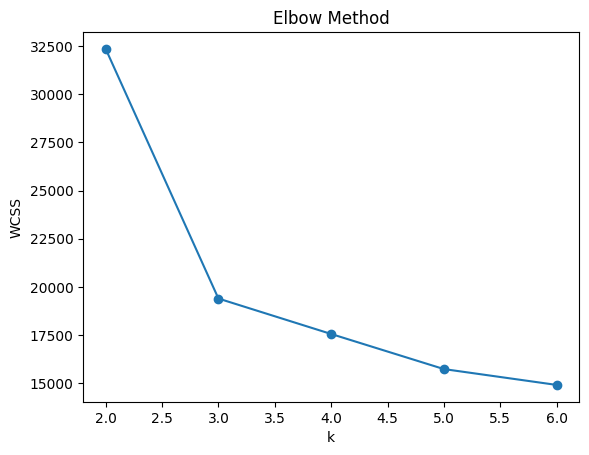

In [ ]:
# Clustering: Elbow + Silhouette
X_clust = X_pca
wcss, sil = [], []
K_RANGE = range(2, 7)
for k in K_RANGE:
    km = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = km.fit_predict(X_clust)
    wcss.append(km.inertia_)
    sil.append(silhouette_score(X_clust, labels, sample_size=min(2000, len(X_clust))))

plt.figure()
plt.plot(K_RANGE, wcss, marker="o"); plt.title("Elbow Method")
plt.xlabel("k"); plt.ylabel("WCSS"); plt.show()



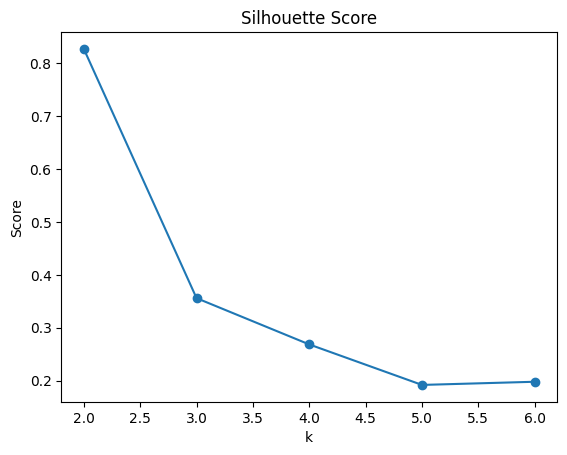

Selected k = 2


In [ ]:
plt.figure()
plt.plot(K_RANGE, sil, marker="o"); plt.title("Silhouette Score")
plt.xlabel("k"); plt.ylabel("Score"); plt.show()

best_k = K_RANGE[np.argmax(sil)]
print(f"Selected k = {best_k}")

kmeans = KMeans(n_clusters=best_k, random_state=42, n_init=10)
clusters = kmeans.fit_predict(X_clust)

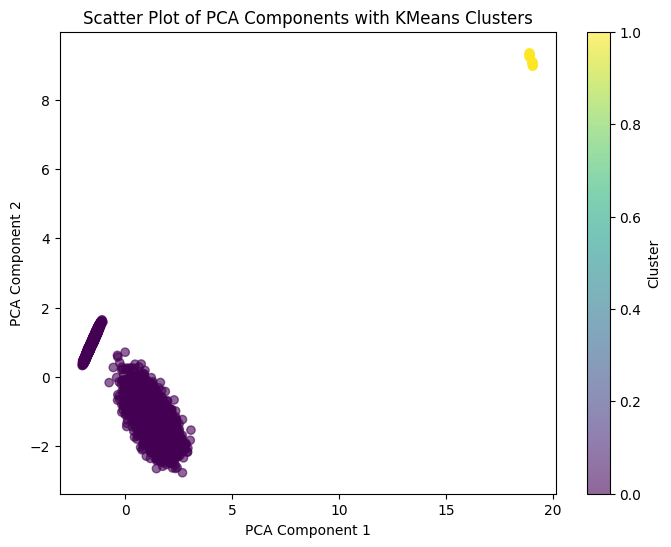

In [ ]:
plt.figure(figsize=(8,6))
plt.scatter(X_pca[:,0], X_pca[:,1], c=clusters, alpha=0.6)
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.title("Scatter Plot of PCA Components with KMeans Clusters")
plt.colorbar(label="Cluster")
plt.show()

In [ ]:
# Add clusters to dataset
df["Cluster"] = clusters

In [ ]:
# Cluster profiles
print("\nCluster sizes:\n", df["Cluster"].value_counts())


Cluster sizes:
 Cluster
0    4321
1      38
Name: count, dtype: int64


In [ ]:
print("\nCluster numeric means:\n", df.groupby("Cluster")[num_features].mean(numeric_only=True))


Cluster numeric means:
                     ID         Age  Tumor Size (cm)  Cancer Stage  \
Cluster                                                             
0         42843.298079   54.404305         1.786092      1.114788   
1        428411.195228  544.094976        17.884182     11.167699   

         Survival Rate (5-Year, %)  Cost of Treatment (USD)  \
Cluster                                                       
0                        79.685106             38997.516836   
1                       796.381179            391036.288139   

         Economic Burden (Lost Workdays per Year)  Tumor_Size_Discrete  
Cluster                                                                 
0                                       52.695441             0.738949  
1                                      527.531544             2.000000  


In [ ]:
print("\nCancer diagnosis per cluster:\n", df.groupby("Cluster")["Oral Cancer (Diagnosis)"].value_counts())


Cancer diagnosis per cluster:
 Cluster  Oral Cancer (Diagnosis)
0        Yes                        2177
         No                         2144
1        Yes                          22
         No                           16
Name: count, dtype: int64


In [ ]:
# Save results
df.to_csv("/content/oral_cancer_with_clusters.csv", index=False)

Evaluation & Interpretation

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report
import pandas as pd

# Dictionary to store results
results = {}

def evaluate_model(y_true, y_pred, y_proba, model_name):
    acc = accuracy_score(y_true, y_pred)
    prec = precision_score(y_true, y_pred, pos_label="Yes")
    rec = recall_score(y_true, y_pred, pos_label="Yes")
    f1 = f1_score(y_true, y_pred, pos_label="Yes")
    auc = roc_auc_score((y_true == "Yes").astype(int), y_proba)

    print(f"\n--- {model_name} ---")
    print("Accuracy:", acc)
    print(classification_report(y_true, y_pred))

    # Save all metrics
    results[model_name] = {
        "Accuracy": round(acc, 4),
        "Precision": round(prec, 4),
        "Recall": round(rec, 4),
        "F1-Score": round(f1, 4),
        "ROC-AUC": round(auc, 4)
    }

# Logistic Regression
y_pred_log = log_reg.predict(X_test)
y_proba_log = log_reg.predict_proba(X_test)[:, 1]
evaluate_model(y_test, y_pred_log, y_proba_log, "Logistic Regression")

# Random Forest
y_pred_rf = rf.predict(X_test)
y_proba_rf = rf.predict_proba(X_test)[:, 1]
evaluate_model(y_test, y_pred_rf, y_proba_rf, "Random Forest")

# SVM
y_pred_svm = svm_model.predict(X_test)
y_proba_svm = svm_model.predict_proba(X_test)[:, 1]
evaluate_model(y_test, y_pred_svm, y_proba_svm, "Support Vector Machine (SVM)")

# KNN
y_pred_knn = knn_model.predict(X_test)
y_proba_knn = knn_model.predict_proba(X_test)[:, 1]
evaluate_model(y_test, y_pred_knn, y_proba_knn, "K-Nearest Neighbors (KNN)")

# Gradient Boosting
y_pred_gb = gb_model.predict(X_test)
y_proba_gb = gb_model.predict_proba(X_test)[:, 1]
evaluate_model(y_test, y_pred_gb, y_proba_gb, "Gradient Boosting")


--- Logistic Regression ---
Accuracy: 0.9977064220183486
              precision    recall  f1-score   support

          No       1.00      1.00      1.00       432
         Yes       1.00      1.00      1.00       440

    accuracy                           1.00       872
   macro avg       1.00      1.00      1.00       872
weighted avg       1.00      1.00      1.00       872


--- Random Forest ---
Accuracy: 0.9988532110091743
              precision    recall  f1-score   support

          No       1.00      1.00      1.00       432
         Yes       1.00      1.00      1.00       440

    accuracy                           1.00       872
   macro avg       1.00      1.00      1.00       872
weighted avg       1.00      1.00      1.00       872


--- Support Vector Machine (SVM) ---
Accuracy: 0.9919724770642202
              precision    recall  f1-score   support

          No       1.00      0.98      0.99       432
         Yes       0.98      1.00      0.99       440

    a

In [ ]:
#Convert results to DataFrame
results_df = pd.DataFrame(results).T
print("\nModel Comparison:\n")
print(results_df)

#Select best model by accuracy
best_model = results_df["Accuracy"].idxmax()
best_accuracy = results_df["Accuracy"].max()


print(f"Best Model: {best_model} with Accuracy = {best_accuracy:.4f}")


Model Comparison:

                              Accuracy  Precision  Recall  F1-Score  ROC-AUC
Logistic Regression             0.9977     0.9955  1.0000    0.9977   1.0000
Random Forest                   0.9989     0.9977  1.0000    0.9989   1.0000
Support Vector Machine (SVM)    0.9920     0.9843  1.0000    0.9921   0.9999
K-Nearest Neighbors (KNN)       0.9908     0.9932  0.9886    0.9909   0.9976
Gradient Boosting               0.9989     0.9977  1.0000    0.9989   1.0000
Best Model: Random Forest with Accuracy = 0.9989


In [ ]:
# Cross-validation
cv_scores = cross_val_score(rf, X, y, cv=5)
print("\nCross-validation (Random Forest):", cv_scores, "Mean:", cv_scores.mean())


Cross-validation (Random Forest): [1.         0.99885321 0.99655963 1.         1.        ] Mean: 0.9990825688073395


In [ ]:
# Hyperparameter tuning (RF)
param_grid = {"clf__n_estimators": [100,200], "clf__max_depth": [None,10,20]}
grid = GridSearchCV(rf, param_grid, cv=3, scoring="accuracy")
grid.fit(X_train, y_train)
print("\nBest Parameters (RF):", grid.best_params_)


Best Parameters (RF): {'clf__max_depth': None, 'clf__n_estimators': 100}


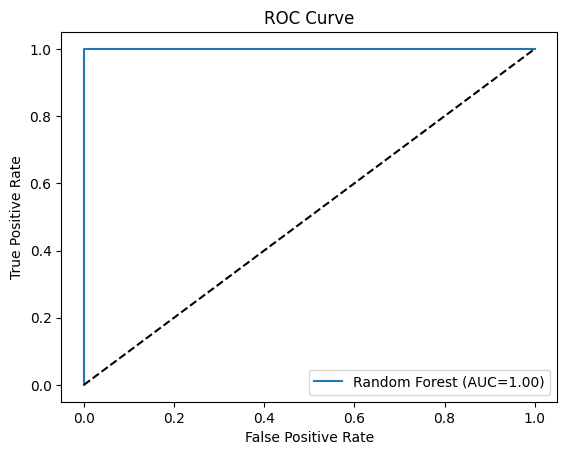

In [ ]:
# ROC Curve
y_proba_rf = grid.best_estimator_.predict_proba(X_test)[:,1]
fpr, tpr, _ = roc_curve(y_test, y_proba_rf, pos_label="Yes")
plt.plot(fpr, tpr, label=f"Random Forest (AUC={roc_auc_score(y_test, y_proba_rf):.2f})")
plt.plot([0,1],[0,1],"k--")
plt.xlabel("False Positive Rate"); plt.ylabel("True Positive Rate")
plt.title("ROC Curve"); plt.legend(); plt.show()